In [1]:
# Building a Neural network

# garbage_dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [2]:
base_path = '../dataset/garbage_dataset'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))


1889


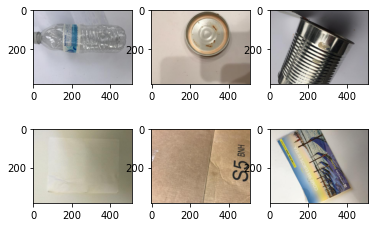

In [3]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 1701 images belonging to 4 classes.
Found 188 images belonging to 4 classes.
{0: 'cardboard', 1: 'metal', 2: 'paper', 3: 'plastic'}


In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 32)       

In [10]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
107/107 [==============================] - 161s 1s/step - loss: 1.2633 - acc: 0.3962 - val_loss: 1.4460 - val_acc: 0.3511
Epoch 2/20
107/107 [==============================] - 169s 2s/step - loss: 1.0333 - acc: 0.5379 - val_loss: 0.9848 - val_acc: 0.5798
Epoch 3/20
107/107 [==============================] - 166s 2s/step - loss: 0.9620 - acc: 0.5691 - val_loss: 1.2191 - val_acc: 0.4628
Epoch 4/20
107/107 [==============================] - 160s 1s/step - loss: 0.9341 - acc: 0.5779 - val_loss: 0.9194 - val_acc: 0.5957
Epoch 5/20
107/107 [==============================] - 160s 1s/step - loss: 0.8689 - acc: 0.6308 - val_loss: 0.8728 - val_acc: 0.6170
Epoch 6/20
107/107 [==============================] - 165s 2s/step - loss: 0.8407 - acc: 0.6437 - val_loss: 0.8054 - val_acc: 0.6702
Epoch 7/20
107/107 [==============================] - 174s 2s/step - loss: 0.7744 - acc: 0.6825 - val_loss: 0.9751 - val_acc: 0.5479
Epoch 8/20
107/107 [==============================] - 161s 1s/step - 

In [1]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

NameError: name 'validation_generator' is not defined